In [75]:
#Building a simple trading strategy

In [103]:
#importing pandas libraries
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

In [104]:
#getting the file path
csvpath = Path("BTC-USD.csv")

In [105]:
pd.read_csv(csvpath)
btc = pd.read_csv(csvpath)
# Adding two new columns - MA10 and MA50
btc['MA10'] = btc['Close'].rolling(10).mean()
btc['MA50'] = btc['Close'].rolling(50).mean()
#btc = btc.dropna()
btc.head()


,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
0,2016-10-14,637.007996,641.284973,637.007996,640.377991,640.377991,58144600.0,NaN,NaN
1,2016-10-15,640.310974,642.101990,637.390015,638.645996,638.645996,39035400.0,NaN,NaN
2,2016-10-16,639.083008,642.898010,638.901001,641.630981,641.630981,40298100.0,NaN,NaN
3,2016-10-17,641.817993,642.328003,638.663025,639.192993,639.192993,58063600.0,NaN,NaN
4,2016-10-18,639.411011,640.736023,635.995972,637.960022,637.960022,65546700.0,NaN,NaN


In [106]:
# Adding two new columns - MA10 and MA50
btc['MA10'] = btc['Close'].rolling(10).mean()
btc['MA50'] = btc['Close'].rolling(50).mean()
btc = btc.dropna()
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
49,2016-12-02,757.544983,781.296021,757.544983,777.943970,777.943970,127605000.0,744.577490,704.330020
50,2016-12-03,778.247986,778.247986,764.856018,771.155029,771.155029,69547296.0,747.233594,706.945560
51,2016-12-04,771.638000,773.872009,768.161011,773.872009,773.872009,60557900.0,750.591894,709.650081
52,2016-12-05,773.393982,773.468018,751.713013,758.700012,758.700012,106363000.0,752.296997,711.991461
53,2016-12-06,758.719971,765.622009,758.719971,764.223999,764.223999,116218000.0,755.181195,714.492081


In [107]:
#Adding a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

btc['Shares'] = [1 if btc.loc[ei, 'MA10']>btc.loc[ei, 'MA50'] else 0 for ei in btc.index]

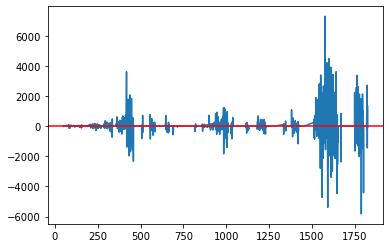

In [108]:
#Plot a graph to show the Profit/Loss
btc['Close1'] = btc['Close'].shift(-1)
btc['Profit'] = [btc.loc[ei, 'Close1'] - btc.loc[ei, 'Close'] if btc.loc[ei, 'Shares']==1 else 0 for ei in btc.index]
btc['Profit'].plot()
plt.axhline(y=0, color='red')

In [109]:
#Using .cumsum() to calculate the accumulated wealth over the period

btc['wealth'] = btc['Profit'].cumsum()
btc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
1822,2021-10-10,54952.820313,56401.304688,54264.257813,54771.578125,54771.578125,3.952779e+10,51753.117969,47584.276484,1,57484.789063,2713.210938,44238.860353
1823,2021-10-11,54734.125000,57793.039063,54519.765625,57484.789063,57484.789063,4.263733e+10,52689.902734,47747.539219,1,56041.058594,-1443.730469,42795.129884
1824,2021-10-12,57526.832031,57627.878906,54477.972656,56041.058594,56041.058594,4.108376e+10,53522.859766,47877.437422,1,57401.097656,1360.039062,44155.168946
1825,2021-10-13,56038.257813,57688.660156,54370.972656,57401.097656,57401.097656,4.168425e+10,54442.974219,48071.337031,1,57323.117188,-77.980468,44077.188478
1826,2021-10-14,57491.265625,58382.339844,57211.796875,57323.117188,57323.117188,4.084210e+10,55263.995703,48238.583594,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 44077.188478000004')

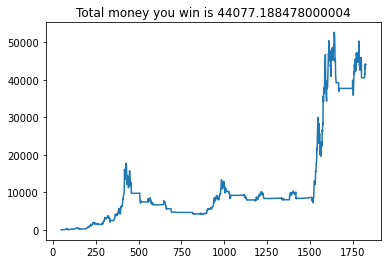

In [110]:
#plot the wealth to show the growth of profit over the period

btc['wealth'].plot()
plt.title('Total money you win is {}'.format(btc.loc[btc.index[-2], 'wealth']))